<a href="https://colab.research.google.com/github/SongZhou-Meg/A-B-Testing/blob/main/CN_Logistic_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jupyter-datatables

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.8/237.8 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 35.9 MB/s eta 0:00:00
  Created wheel for csscompressor: filename=csscompressor-0.9.5-py3-none-any.whl size=240333 sha256=cf66ff7d947d193dfa637846b1cf3f94d0aa91c957c524f2ccbbef985d808cce
  Stored in directory: /root/.cache/pip/wheels/23/87/3c/3811e0b3e93b0778079202c3f3d68bd7b45d69ce2d80eaf775
  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-no

In [ ]:
import pandas as pd
import numpy as np
from jupyter_datatables import init_datatables_mode

In [ ]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Domestic Shipping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# read excel data df1 as customer1
data_path1 = '/content/drive/MyDrive/Data/CN/Test Data v3.xlsx'
df1 = pd.read_excel(data_path1, sheet_name = 'Customer1')

df1_copy = df1.copy()
df1

Mounted at /content/drive


,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER
0,10/01/2022,00:00:01,10/01/2022,00:37:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper X,Shipper 81
1,10/01/2022,00:01:01,10/01/2022,00:08:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,
2,10/01/2022,00:01:01,10/01/2022,00:12:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,
3,10/01/2022,00:05:01,10/01/2022,00:16:01,DROP UNIT,Domestic,Customer1,1,0,0,Shipper J,
4,10/01/2022,00:07:01,10/01/2022,00:13:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,
...,...,...,...,...,...,...,...,...,...,...,...,...
7663,23/01/2022,23:52:01,24/01/2022,00:04:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper A,Shipper A
7664,23/01/2022,23:54:01,24/01/2022,01:29:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper L,Shipper L
7665,23/01/2022,23:55:01,24/01/2022,00:06:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper A,Shipper A
7666,23/01/2022,23:56:01,24/01/2022,01:49:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper N


In [ ]:
# check if there are missing value in df1
temp_null=df1.isnull().sum()
total=df1.isnull().count()
percent=temp_null/total
missing_data=pd.concat([temp_null,percent],axis=1,keys=['temp_null','percent'])
missing_data

,temp_null,percent
INGATE DATE,0,0.0
INGATE TIME,0,0.0
OUTGATE DATE,0,0.0
OUTGATE TIME,0,0.0
MOVE TYPE,0,0.0
MARKET SEGMENT,0,0.0
CUSTOMER,0,0.0
INGATE EQUIP COUNT,0,0.0
PLANNED OUTGATE EQUIP COUNT,0,0.0
OUTGATE EQUIP COUNT,0,0.0


In [ ]:
# change the data type to datetime
from datetime import datetime
df1['INGATE DATE'] = pd.to_datetime(df1['INGATE DATE'])
df1['INGATE TIME'] = pd.to_datetime(df1['INGATE TIME'], format='%H:%M:%S')



<ipython-input-5-da96314547af>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['INGATE DATE'] = pd.to_datetime(df1['INGATE DATE'])


In [ ]:
df1['day_of_week'] = df1['INGATE DATE'].dt.day_name()

In [ ]:
df1['hour'] = df1['INGATE TIME'].dt.hour


In [ ]:
# Group by hour of the day and calculate average value
hourly_avg = df1.groupby('hour').count()

# Group by day of the week and calculate count
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_count = df1.groupby('day_of_week')['INGATE DATE'].count().reindex(weekday_order)

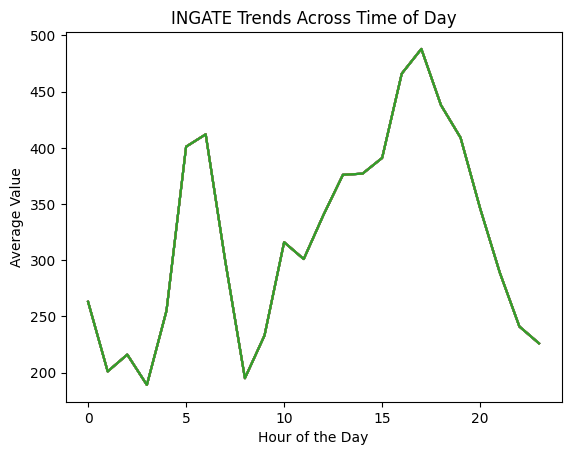

In [ ]:
import matplotlib.pyplot as plt

# Plot the hourly counts
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.title('INGATE Trends Across Time of Day')
plt.show()



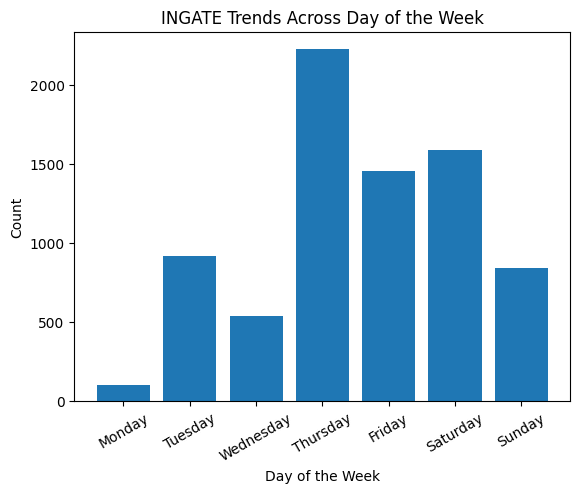

In [ ]:
# Plot the daily count
plt.bar(daily_count.index, daily_count.values)
plt.xlabel('Day of the Week')
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.title('INGATE Trends Across Day of the Week')
plt.show()

In [ ]:
df1['OUTGATE DATE'] = pd.to_datetime(df1['OUTGATE DATE'])
df1['OUTGATE TIME'] = pd.to_datetime(df1['OUTGATE TIME'], format='%H:%M:%S')


<ipython-input-11-7346332eddea>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['OUTGATE DATE'] = pd.to_datetime(df1['OUTGATE DATE'])


In [ ]:
df1['day_of_week2'] = df1['OUTGATE DATE'].dt.day_name()
df1['hour2'] = df1['OUTGATE TIME'].dt.hour

In [ ]:
# Group by hour of the day and calculate average value
hourly_avg = df1.groupby('hour2').count()

# Group by day of the week and calculate count
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_count = df1.groupby('day_of_week2')['OUTGATE DATE'].count().reindex(weekday_order)

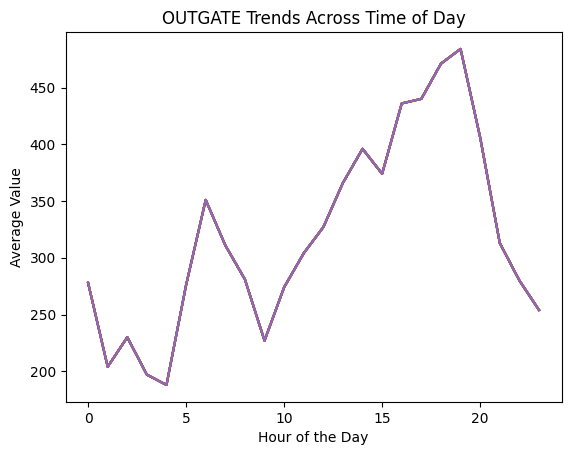

In [ ]:
# Plot the hourly counts for outgate
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.title('OUTGATE Trends Across Time of Day')
plt.show()

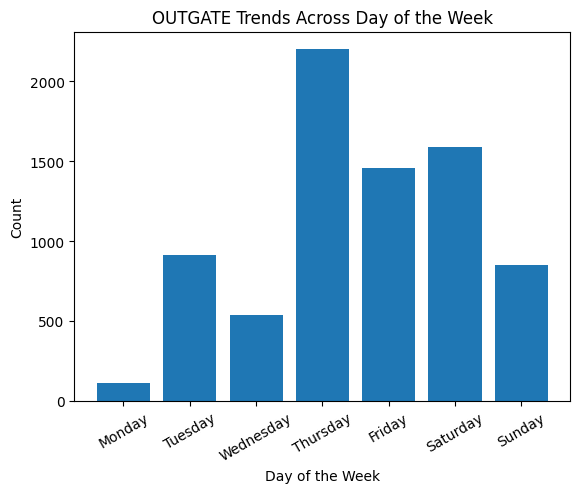

In [ ]:
# Plot the daily count
plt.bar(daily_count.index, daily_count.values)
plt.xlabel('Day of the Week')
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.title('OUTGATE Trends Across Day of the Week')
plt.show()

In [ ]:
# combind the Ingate's date and time together as indatetime
df1['indatetime'] = pd.to_datetime(df1['INGATE DATE'].astype(str) + ' ' + df1['INGATE TIME'].astype(str))


In [ ]:
# combind the Outgate's date and time together as outdatetime
df1['outdatetime'] = pd.to_datetime(df1['OUTGATE DATE'].astype(str) + ' ' + df1['OUTGATE TIME'].astype(str))

In [ ]:
# get the time difference between in and out
df1['time_diff'] = df1.outdatetime - df1.indatetime
df1.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-10-01,1900-01-01 00:00:01,2022-10-01,1900-01-01 00:37:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper X,Shipper 81,Saturday,0,Saturday,0,2022-10-01 00:00:01-01:00,2022-10-01 00:37:01-01:00,0 days 00:37:00
1,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:08:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:08:01-01:00,0 days 00:07:00
2,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:12:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:12:01-01:00,0 days 00:11:00
3,2022-10-01,1900-01-01 00:05:01,2022-10-01,1900-01-01 00:16:01,DROP UNIT,Domestic,Customer1,1,0,0,Shipper J,,Saturday,0,Saturday,0,2022-10-01 00:05:01-01:00,2022-10-01 00:16:01-01:00,0 days 00:11:00
4,2022-10-01,1900-01-01 00:07:01,2022-10-01,1900-01-01 00:13:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,,Saturday,0,Saturday,0,2022-10-01 00:07:01-01:00,2022-10-01 00:13:01-01:00,0 days 00:06:00


In [ ]:
# drop the data which has negative days and has value of days more than 1
df1 = df1[df1['time_diff']>= pd.Timedelta(days=0)]
df1 = df1[df1['time_diff']< pd.Timedelta(days=1)]

In [ ]:
# Convert 'time_diff' to minutes
df1['time_diff'] = df1['time_diff'].apply(lambda x: x.total_seconds() / 60)
df1.head()





,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-10-01,1900-01-01 00:00:01,2022-10-01,1900-01-01 00:37:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper X,Shipper 81,Saturday,0,Saturday,0,2022-10-01 00:00:01-01:00,2022-10-01 00:37:01-01:00,37.0
1,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:08:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:08:01-01:00,7.0
2,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:12:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:12:01-01:00,11.0
3,2022-10-01,1900-01-01 00:05:01,2022-10-01,1900-01-01 00:16:01,DROP UNIT,Domestic,Customer1,1,0,0,Shipper J,,Saturday,0,Saturday,0,2022-10-01 00:05:01-01:00,2022-10-01 00:16:01-01:00,11.0
4,2022-10-01,1900-01-01 00:07:01,2022-10-01,1900-01-01 00:13:01,DROP CHASSIS,Domestic,Customer1,1,0,0,AGENT,,Saturday,0,Saturday,0,2022-10-01 00:07:01-01:00,2022-10-01 00:13:01-01:00,6.0


In [ ]:
new_df1 = df1.copy(deep=True)

In [ ]:
def Inshipper2num(x):
    if x == '            ':
      return 0
    if x == 'AGENT       ':
      x = 1
    elif x == 'AGENTPRODUCT':
      x = 2

    elif isinstance(x, str):
        x = x.strip()
        x = x.strip("Shipper ")
        if x == '550L':
            x = x.strip('L')
        if x =='':
          return -1000


        if x.isalpha():
          x = x.strip()
          x = 700 + ord(x)
        else:
          x = int(x)
    else:
      x = float(x)

    return float(x)


In [ ]:
df1['INGATE_SHIPPER'] = df1['INGATE_SHIPPER'].apply(Inshipper2num)
df1.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-10-01,1900-01-01 00:00:01,2022-10-01,1900-01-01 00:37:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,788.0,Shipper 81,Saturday,0,Saturday,0,2022-10-01 00:00:01-01:00,2022-10-01 00:37:01-01:00,37.0
1,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:08:01,DROP CHASSIS,Domestic,Customer1,1,0,0,1.0,,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:08:01-01:00,7.0
2,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:12:01,DROP CHASSIS,Domestic,Customer1,1,0,0,1.0,,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:12:01-01:00,11.0
3,2022-10-01,1900-01-01 00:05:01,2022-10-01,1900-01-01 00:16:01,DROP UNIT,Domestic,Customer1,1,0,0,774.0,,Saturday,0,Saturday,0,2022-10-01 00:05:01-01:00,2022-10-01 00:16:01-01:00,11.0
4,2022-10-01,1900-01-01 00:07:01,2022-10-01,1900-01-01 00:13:01,DROP CHASSIS,Domestic,Customer1,1,0,0,1.0,,Saturday,0,Saturday,0,2022-10-01 00:07:01-01:00,2022-10-01 00:13:01-01:00,6.0


In [ ]:
df1['INGATE_SHIPPER'].value_counts()

0.0      2389
1.0       615
765.0     607
776.0     284
9.0       148
         ... 
558.0       1
368.0       1
32.0        1
576.0       1
536.0       1
Name: INGATE_SHIPPER, Length: 426, dtype: int64

In [ ]:
def Outshipper2num(x):
    if x == '            ':
      x = 0
    if x == 'AGENT       ':
      x = 1
    elif x == 'AGENTPRODUCT':
      x = 2

    elif isinstance(x, str):
        x = x.strip()
        x = x.strip("Shipper ")

        if x =='':
          return -1000


        if len(x) == 1:  # Check if x is a single character
            if x.isalpha():
                x = x.strip()
                x = 700 + ord(x)
            else:
                x = int(x)
        else:
            try:
                x = int(x)
            except ValueError:
                # Handle the case when x is a string of length greater than 1
                x = sum(ord(ch) for ch in x)
    else:
      x = float(x)

    return float(x)

In [ ]:
df1['OUTGATE_SHIPPER'] = df1['OUTGATE_SHIPPER'].apply(Outshipper2num)


In [ ]:
df1['OUTGATE_SHIPPER'].value_counts()

0.0      2201
765.0     881
1.0       268
776.0     164
81.0      160
         ... 
513.0       1
384.0       1
385.0       1
396.0       1
537.0       1
Name: OUTGATE_SHIPPER, Length: 379, dtype: int64

In [ ]:
df1.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-10-01,1900-01-01 00:00:01,2022-10-01,1900-01-01 00:37:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,788.0,81.0,Saturday,0,Saturday,0,2022-10-01 00:00:01-01:00,2022-10-01 00:37:01-01:00,37.0
1,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:08:01,DROP CHASSIS,Domestic,Customer1,1,0,0,1.0,0.0,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:08:01-01:00,7.0
2,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:12:01,DROP CHASSIS,Domestic,Customer1,1,0,0,1.0,0.0,Saturday,0,Saturday,0,2022-10-01 00:01:01-01:00,2022-10-01 00:12:01-01:00,11.0
3,2022-10-01,1900-01-01 00:05:01,2022-10-01,1900-01-01 00:16:01,DROP UNIT,Domestic,Customer1,1,0,0,774.0,0.0,Saturday,0,Saturday,0,2022-10-01 00:05:01-01:00,2022-10-01 00:16:01-01:00,11.0
4,2022-10-01,1900-01-01 00:07:01,2022-10-01,1900-01-01 00:13:01,DROP CHASSIS,Domestic,Customer1,1,0,0,1.0,0.0,Saturday,0,Saturday,0,2022-10-01 00:07:01-01:00,2022-10-01 00:13:01-01:00,6.0


In [ ]:
def day_of_week2num(x):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_index = days_of_week.index(x) +1
    return day_index


In [ ]:
df1['day_of_week'] = df1['day_of_week'].apply(day_of_week2num)


In [ ]:
df1['day_of_week2'] = df1['day_of_week2'].apply(day_of_week2num)

In [ ]:
def Movetype2num(x):
    move_type = ['DROP UNIT PICKUP UNIT', 'PICKUP UNIT', 'DROP UNIT', 'DROP CHASSIS', 'DROP CHASSIS PICKUP UNIT']
    type_index = move_type.index(x) +1
    return type_index

In [ ]:
df1['MOVE TYPE'] = df1['MOVE TYPE'].apply(Movetype2num)

In [ ]:
df1.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-10-01,1900-01-01 00:00:01,2022-10-01,1900-01-01 00:37:01,1,Domestic,Customer1,1,1,1,788.0,81.0,6,0,6,0,2022-10-01 00:00:01-01:00,2022-10-01 00:37:01-01:00,37.0
1,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:08:01,4,Domestic,Customer1,1,0,0,1.0,0.0,6,0,6,0,2022-10-01 00:01:01-01:00,2022-10-01 00:08:01-01:00,7.0
2,2022-10-01,1900-01-01 00:01:01,2022-10-01,1900-01-01 00:12:01,4,Domestic,Customer1,1,0,0,1.0,0.0,6,0,6,0,2022-10-01 00:01:01-01:00,2022-10-01 00:12:01-01:00,11.0
3,2022-10-01,1900-01-01 00:05:01,2022-10-01,1900-01-01 00:16:01,3,Domestic,Customer1,1,0,0,774.0,0.0,6,0,6,0,2022-10-01 00:05:01-01:00,2022-10-01 00:16:01-01:00,11.0
4,2022-10-01,1900-01-01 00:07:01,2022-10-01,1900-01-01 00:13:01,4,Domestic,Customer1,1,0,0,1.0,0.0,6,0,6,0,2022-10-01 00:07:01-01:00,2022-10-01 00:13:01-01:00,6.0


In [ ]:
df1['OUTGATE EQUIP COUNT'].value_counts()

1    5438
0    2201
2       2
Name: OUTGATE EQUIP COUNT, dtype: int64

In [ ]:
transformed_df1 = pd.concat([df1['MOVE TYPE'], df1['INGATE EQUIP COUNT'], df1['PLANNED OUTGATE EQUIP COUNT'], df1['OUTGATE EQUIP COUNT'],
                             df1['INGATE_SHIPPER'], df1['OUTGATE_SHIPPER'], df1['day_of_week'],df1['hour'],df1['day_of_week2'],df1['hour2'],df1['time_diff']], axis=1)

In [ ]:
transformed_df1.head()

,MOVE TYPE,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,time_diff
0,1,1,1,1,788.0,81.0,6,0,6,0,37.0
1,4,1,0,0,1.0,0.0,6,0,6,0,7.0
2,4,1,0,0,1.0,0.0,6,0,6,0,11.0
3,3,1,0,0,774.0,0.0,6,0,6,0,11.0
4,4,1,0,0,1.0,0.0,6,0,6,0,6.0


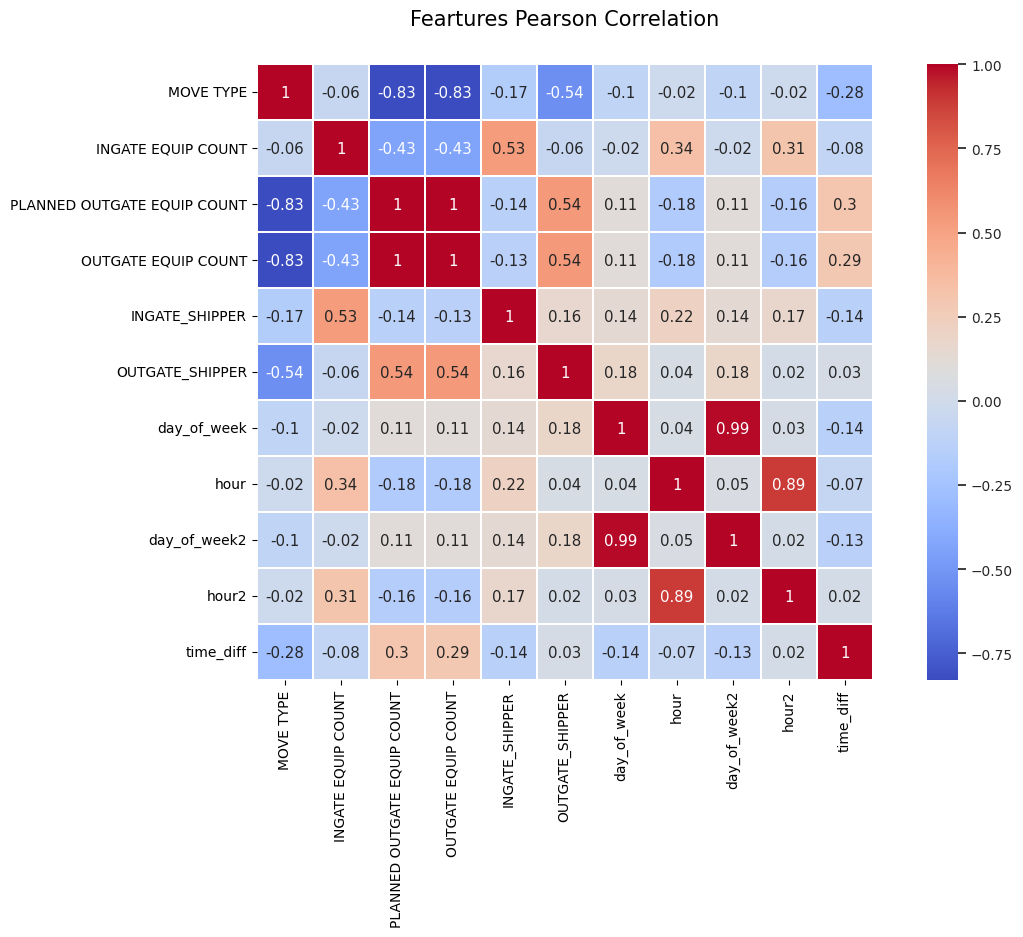

In [ ]:
def pearson_corr(df):


    correlation = df.astype(float).corr(method='pearson')
    colormap = plt.cm.RdBu

    plt.figure(figsize=(14,8))
    plt.title('Feartures Pearson Correlation', y=1.05, size=15)
    sns.set(font_scale=0.9)
    sns.heatmap(round(correlation,2),linewidths=0.1,vmax=1.0, square=True,
                cmap='coolwarm', linecolor='white', annot=True)
    plt.show()

pearson_corr(transformed_df1)


In [ ]:
transformed_df1_2 = transformed_df1.drop(['PLANNED OUTGATE EQUIP COUNT','day_of_week2'], axis=1)

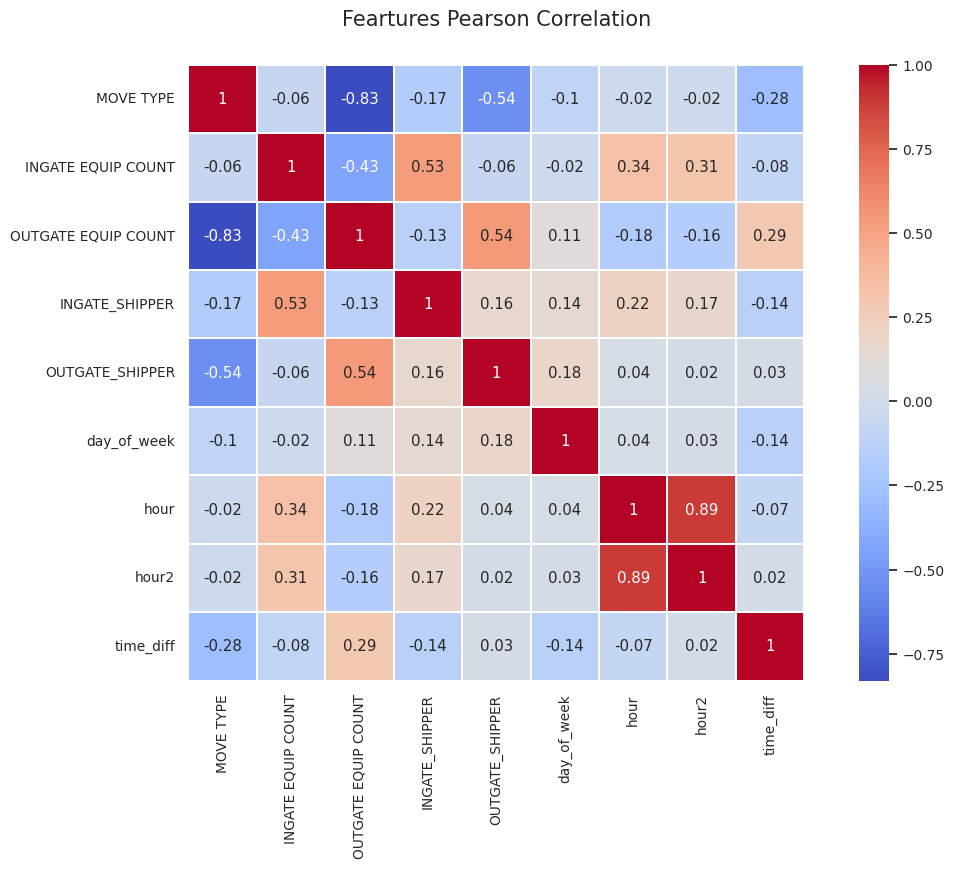

In [ ]:
pearson_corr(transformed_df1_2)


Text(0.5, 1.0, 'Correlation with TARGET variable')

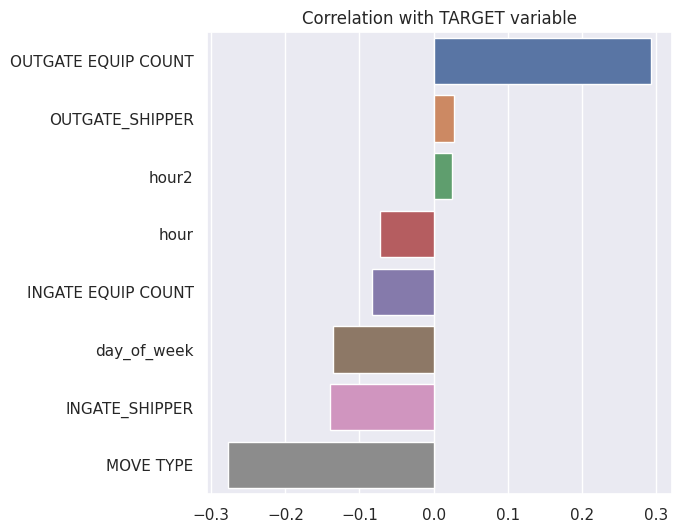

In [ ]:
sns.set(font_scale=1)
corr_with_status = transformed_df1_2.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.barplot(x=corr_with_status.values, y=corr_with_status.index)
plt.title('Correlation with TARGET variable')

In [ ]:
df1['INGATE EQUIP COUNT'].value_counts()

1    5252
0    2389
Name: INGATE EQUIP COUNT, dtype: int64

In [ ]:
df1['PLANNED OUTGATE EQUIP COUNT'].value_counts()

1    5435
0    2198
2       7
3       1
Name: PLANNED OUTGATE EQUIP COUNT, dtype: int64

In [ ]:
df1['OUTGATE EQUIP COUNT'].value_counts()

1    5438
0    2201
2       2
Name: OUTGATE EQUIP COUNT, dtype: int64

In [ ]:
mask = new_df1['PLANNED OUTGATE EQUIP COUNT'] != new_df1['OUTGATE EQUIP COUNT']
differences = new_df1[mask]
differences

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
716,2022-11-01,1900-01-01 05:29:01,2022-11-01,1900-01-01 12:26:01,PICKUP UNIT,Domestic,Customer1,0,2,1,,Shipper 91,Tuesday,5,Tuesday,12,2022-11-01 05:29:01-01:00,2022-11-01 12:26:01-01:00,417.0
826,2022-11-01,1900-01-01 10:44:01,2022-11-01,1900-01-01 12:56:01,PICKUP UNIT,Domestic,Customer1,0,2,1,,Shipper 16,Tuesday,10,Tuesday,12,2022-11-01 10:44:01-01:00,2022-11-01 12:56:01-01:00,132.0
838,2022-11-01,1900-01-01 11:04:01,2022-11-01,1900-01-01 13:17:01,PICKUP UNIT,Domestic,Customer1,0,2,1,,Shipper 222,Tuesday,11,Tuesday,13,2022-11-01 11:04:01-01:00,2022-11-01 13:17:01-01:00,133.0
1370,2022-12-01,1900-01-01 06:15:01,2022-12-01,1900-01-01 06:50:01,PICKUP UNIT,Domestic,Customer1,0,2,1,,Shipper 10,Thursday,6,Thursday,6,2022-12-01 06:15:01-01:00,2022-12-01 06:50:01-01:00,35.0
3931,2022-01-15,1900-01-01 20:54:01,2022-01-15,1900-01-01 21:11:01,DROP CHASSIS,Domestic,Customer1,1,1,0,AGENT,,Saturday,20,Saturday,21,2022-01-15 20:54:01-01:00,2022-01-15 21:11:01-01:00,17.0
4538,2022-01-18,1900-01-01 08:19:01,2022-01-18,1900-01-01 13:43:01,PICKUP UNIT,Domestic,Customer1,0,3,2,,Shipper 145,Tuesday,8,Tuesday,13,2022-01-18 08:19:01-01:00,2022-01-18 13:43:01-01:00,324.0
4648,2022-01-18,1900-01-01 16:21:01,2022-01-18,1900-01-01 17:19:01,DROP CHASSIS,Domestic,Customer1,1,1,0,AGENT,,Tuesday,16,Tuesday,17,2022-01-18 16:21:01-01:00,2022-01-18 17:19:01-01:00,58.0
5521,2022-01-20,1900-01-01 07:15:01,2022-01-20,1900-01-01 10:54:01,PICKUP UNIT,Domestic,Customer1,0,2,1,,Shipper 352,Thursday,7,Thursday,10,2022-01-20 07:15:01-01:00,2022-01-20 10:54:01-01:00,219.0
6209,2022-01-21,1900-01-01 07:41:01,2022-01-21,1900-01-01 09:33:01,DROP CHASSIS,Domestic,Customer1,1,1,0,AGENT,,Friday,7,Friday,9,2022-01-21 07:41:01-01:00,2022-01-21 09:33:01-01:00,112.0
7271,2022-01-23,1900-01-01 08:01:01,2022-01-23,1900-01-01 09:13:01,PICKUP UNIT,Domestic,Customer1,0,2,1,,Shipper 143,Sunday,8,Sunday,9,2022-01-23 08:01:01-01:00,2022-01-23 09:13:01-01:00,72.0


In [ ]:
differences.shape

(10, 19)

In [ ]:
df1['MOVE TYPE'].value_counts()

1    3027
2    2389
3    2077
4     124
5      24
Name: MOVE TYPE, dtype: int64

In [ ]:
Pickup_unit = new_df1[new_df1['MOVE TYPE']== 'PICKUP UNIT']['time_diff'].mean()
Pickup_unit

57.094181665969025

In [ ]:
Drop_chassis = new_df1[new_df1['MOVE TYPE']== 'DROP CHASSIS']['time_diff'].mean()
Drop_chassis

13.451612903225806

In [ ]:
Drop_unit = new_df1[new_df1['MOVE TYPE']== 'DROP UNIT']['time_diff'].mean()
Drop_unit

32.21235756700369

In [ ]:
Drop_chassis_pickup_unit = new_df1[new_df1['MOVE TYPE']== 'DROP CHASSIS PICKUP UNIT']['time_diff'].mean()
Drop_chassis_pickup_unit

46.208333333333336

In [ ]:
Drop_unit_pickup_unit = new_df1[new_df1['MOVE TYPE']== 'DROP UNIT PICKUP UNIT']['time_diff'].mean()
Drop_unit_pickup_unit

62.13545864992842

In [ ]:
Pick_chassis = new_df1[new_df1['MOVE TYPE']== 'PICKUP CHASSIS']['time_diff'].mean()
Pick_chassis

nan

In [ ]:
Best = new_df1[new_df1['MOVE TYPE']== 'DROP CHASSIS PICKUP UNIT']
Best.shape

(24, 19)

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'DROP UNIT PICKUP UNIT']['OUTGATE_SHIPPER'].value_counts().head(10)


Shipper A           711
AGENT               143
Shipper D           120
Shipper Q           112
Shipper L            97
Shipper 81           83
Shipper R            74
Shipper V            71
Shipper Z            69
Shipper E            59
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'DROP CHASSIS PICKUP UNIT']['OUTGATE_SHIPPER'].value_counts().head(10)

Shipper F         3
Shipper H         3
Shipper Z         3
Shipper 133       2
Shipper 7         2
Shipper 172       1
Shipper 185       1
Shipper 186       1
Shipper 235       1
Shipper 89        1
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'PICKUP UNIT']['OUTGATE_SHIPPER'].value_counts().head(10)

Shipper A           170
Shipper 13           96
Shipper 81           77
Shipper L            66
Shipper 9            61
Shipper 108          60
Shipper 84           52
AGENT                52
Shipper G            48
Shipper Y            48
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'DROP UNIT']['INGATE_SHIPPER'].value_counts().head(10)

Shipper A             134
Shipper 1             128
Shipper L             115
Shipper 9              83
Shipper 82             63
Shipper 144            57
Shipper Q              49
Shipper J              48
Shipper 84             47
Shipper 2              45
Name: INGATE_SHIPPER, dtype: int64

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'DROP CHASSIS']['INGATE_SHIPPER'].value_counts().head(10)

AGENT           124
Name: INGATE_SHIPPER, dtype: int64

In [ ]:
agent_rows = new_df1[new_df1['INGATE_SHIPPER'].str.strip().str.lower() == 'agent']
agent_rows.shape

(378, 19)

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'PICKUP UNIT']['OUTGATE_SHIPPER'].value_counts().head(10)

Shipper A           170
Shipper 13           96
Shipper 81           77
Shipper L            66
Shipper 9            61
Shipper 108          60
Shipper 84           52
AGENT                52
Shipper G            48
Shipper Y            48
Name: OUTGATE_SHIPPER, dtype: int64

## time-diff

In [ ]:
# show the statistics of time difference between in and out.
df1.describe()

,MOVE TYPE,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,time_diff
count,7641.000000,7641.000000,7641.000000,7641.00000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000
mean,1.917550,0.687345,0.713519,0.71221,234.961785,292.913493,4.582385,12.212145,4.591415,12.656066,51.585408
std,0.868595,0.463606,0.455032,0.45334,300.105849,342.412435,1.529226,6.457626,1.534183,6.516794,44.575594
min,1.000000,0.000000,0.000000,0.00000,0.000000,-1000.000000,1.000000,0.000000,1.000000,0.000000,6.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,6.000000,4.000000,7.000000,22.000000
50%,2.000000,1.000000,1.000000,1.00000,107.000000,114.000000,5.000000,13.000000,5.000000,14.000000,37.000000
75%,3.000000,1.000000,1.000000,1.00000,365.000000,765.000000,6.000000,18.000000,6.000000,18.000000,66.000000
max,5.000000,1.000000,3.000000,2.00000,790.000000,923.000000,7.000000,23.000000,7.000000,23.000000,460.000000


In [ ]:
df1['time_diff'].value_counts()

26.000000     163
22.000000     155
18.000000     155
19.000000     153
14.000000     139
             ... 
205.000000      1
389.000000      1
229.000000      1
417.000000      1
31.016667       1
Name: time_diff, Length: 267, dtype: int64

In [ ]:
# Find the rows that time difference is greater than 45 mintus
df1['time_diff > 45m'] = df1['time_diff'].apply(lambda x : x > 45.0)

In [ ]:
df1['time_diff > 45m'].value_counts()

False    4545
True     3096
Name: time_diff > 45m, dtype: int64

In [ ]:
Top_10_InShippers = df1['INGATE_SHIPPER'].value_counts().head(20)
Top_10_InShippers



0.0      2389
1.0       615
765.0     607
776.0     284
9.0       148
781.0     142
82.0      140
144.0     120
768.0     114
2.0       103
159.0      94
84.0       92
174.0      76
8.0        67
88.0       63
122.0      59
774.0      57
788.0      56
114.0      55
769.0      52
Name: INGATE_SHIPPER, dtype: int64

In [ ]:
filtered_df1 = new_df1[new_df1['time_diff'] > 45]
Top_20_InShippers_late = filtered_df1['INGATE_SHIPPER'].value_counts().head(20)
Top_20_InShippers_late

                      1135
AGENT                  212
Shipper A              132
Shipper L              128
Shipper 1               90
Shipper 9               55
Shipper 2               41
Shipper Q               39
Shipper 82              39
Shipper 84              39
Shipper 159             37
Shipper 144             36
Shipper 114             33
Shipper X               33
Shipper 174             28
Shipper 8               25
Shipper 88              20
Shipper D               19
Shipper 188             18
Shipper 11              18
Name: INGATE_SHIPPER, dtype: int64

### Study for Shipper Agent

In [ ]:
agent_late = filtered_df1[filtered_df1['INGATE_SHIPPER'].str.strip().str.lower() == 'agent']
agent_late.shape

(212, 19)

In [ ]:
agent_late.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
212,2022-10-01,1900-01-01 10:21:01,2022-10-01,1900-01-01 12:02:01,DROP CHASSIS PICKUP UNIT,Domestic,Customer1,1,1,1,AGENT,Shipper 172,Saturday,10,Saturday,12,2022-10-01 10:21:01-01:00,2022-10-01 12:02:01-01:00,101.0
240,2022-10-01,1900-01-01 11:24:01,2022-10-01,1900-01-01 12:10:01,DROP CHASSIS PICKUP UNIT,Domestic,Customer1,1,1,1,AGENT,Shipper 133,Saturday,11,Saturday,12,2022-10-01 11:24:01-01:00,2022-10-01 12:10:01-01:00,46.0
655,2022-11-01,1900-01-01 01:47:01,2022-11-01,1900-01-01 02:57:01,DROP CHASSIS PICKUP UNIT,Domestic,Customer1,1,1,1,AGENT,Shipper 185,Tuesday,1,Tuesday,2,2022-11-01 01:47:01-01:00,2022-11-01 02:57:01-01:00,70.0
661,2022-11-01,1900-01-01 01:55:01,2022-11-01,1900-01-01 03:55:01,DROP CHASSIS PICKUP UNIT,Domestic,Customer1,1,1,1,AGENT,Shipper 186,Tuesday,1,Tuesday,3,2022-11-01 01:55:01-01:00,2022-11-01 03:55:01-01:00,120.0
788,2022-11-01,1900-01-01 08:38:01,2022-11-01,1900-01-01 09:32:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,AGENT,AGENT,Tuesday,8,Tuesday,9,2022-11-01 08:38:01-01:00,2022-11-01 09:32:01-01:00,54.0


In [ ]:
diff_shipper = agent_late[agent_late['INGATE_SHIPPER'] != agent_late['OUTGATE_SHIPPER']]
diff_shipper.shape

(204, 19)

In [ ]:
agent_late['OUTGATE_SHIPPER'].value_counts()

Shipper A       13
Shipper 13      12
Shipper 84      10
Shipper S        8
AGENT            8
                ..
Shipper 90       1
Shipper 512      1
Shipper 155      1
Shipper 203      1
Shipper 380      1
Name: OUTGATE_SHIPPER, Length: 98, dtype: int64

In [ ]:
agent_late['MOVE TYPE'].value_counts()

DROP UNIT PICKUP UNIT       201
DROP CHASSIS PICKUP UNIT      8
DROP CHASSIS                  2
DROP UNIT                     1
Name: MOVE TYPE, dtype: int64

### Study for Pickup unit of outgate shipper

In [ ]:
new_df1[new_df1['MOVE TYPE']== 'PICKUP UNIT']['OUTGATE_SHIPPER'].value_counts().head(15)

Shipper A           170
Shipper 13           96
Shipper 81           77
Shipper L            66
Shipper 9            61
Shipper 108          60
Shipper 84           52
AGENT                52
Shipper G            48
Shipper Y            48
Shipper R            44
Shipper T            42
Shipper 201          40
Shipper 5            39
Shipper K            36
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
filtered_df1[filtered_df1['MOVE TYPE']== 'PICKUP UNIT']['OUTGATE_SHIPPER'].value_counts().head(30)

Shipper 13           57
Shipper 84           46
Shipper A            38
Shipper 9            36
Shipper L            33
Shipper 5            26
Shipper 81           25
Shipper 193          24
Shipper 201          24
Shipper 291          22
Shipper T            21
Shipper Z            21
Shipper Y            21
Shipper 88           19
Shipper G            16
Shipper 115          15
Shipper 299          15
Shipper 46           15
Shipper F            14
Shipper 89           13
Shipper 108          13
Shipper S            12
AGENT                12
Shipper 379          12
Shipper 93           12
Shipper 142          11
Shipper V            11
Shipper Q            10
Shipper 7            10
Shipper 189          10
Name: OUTGATE_SHIPPER, dtype: int64

## For In Gate Shipper, get the following insights:
* Shipper 2 and Shipper 84 could not keep good performance, should delete the contract.
  
  since Shipper 2's time difference is ranking at no.6,
  but the total shipments is not even in top 10.

  Shipper 84 's time difference is ranking at no.9, but the total shipment is not in top 10.



## study time_diff

In [ ]:
transformed_df1['time_diff > 45m'] = transformed_df1['time_diff'].apply(lambda x : x > 45.0)

In [ ]:
filtered_df1_2 = transformed_df1[transformed_df1['time_diff'] > 45]

In [ ]:
transformed_df1.head()

,MOVE TYPE,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,time_diff,time_diff > 45m
0,1,1,1,1,788.0,81.0,6,0,6,0,37.0,False
1,4,1,0,0,1.0,0.0,6,0,6,0,7.0,False
2,4,1,0,0,1.0,0.0,6,0,6,0,11.0,False
3,3,1,0,0,774.0,0.0,6,0,6,0,11.0,False
4,4,1,0,0,1.0,0.0,6,0,6,0,6.0,False


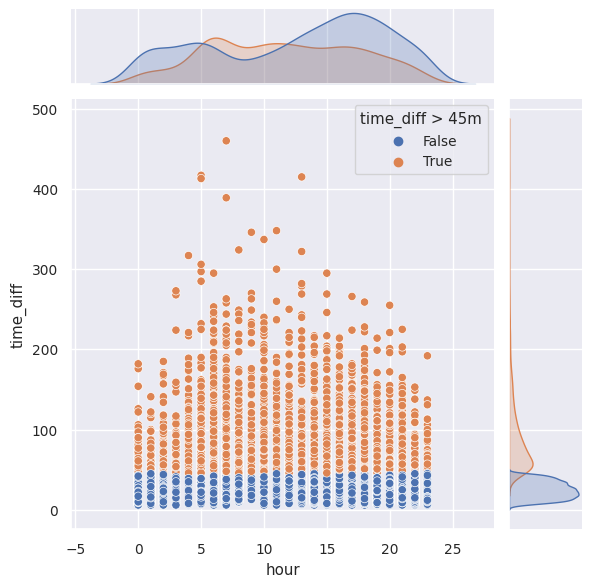

In [ ]:
sns.jointplot(x='hour',y='time_diff',data=transformed_df1,hue='time_diff > 45m')

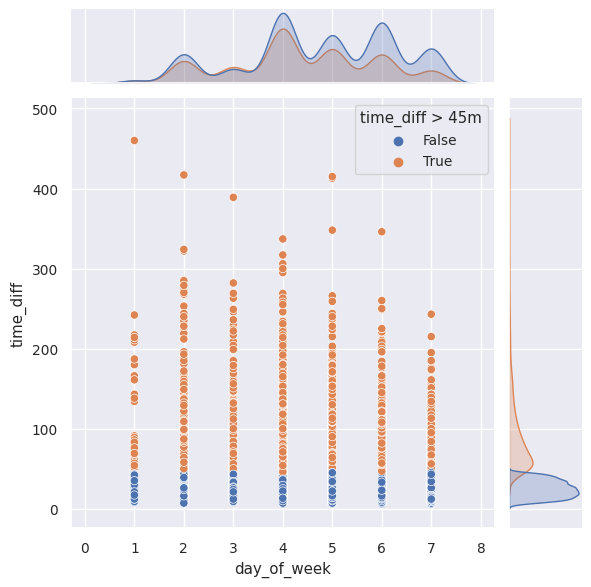

In [ ]:
sns.jointplot(x='day_of_week',y='time_diff',data=transformed_df1,hue='time_diff > 45m')

In [ ]:
# Get the list of encodings corresponding to categories
#encodings = label_encoder.classes_

#print(encodings)

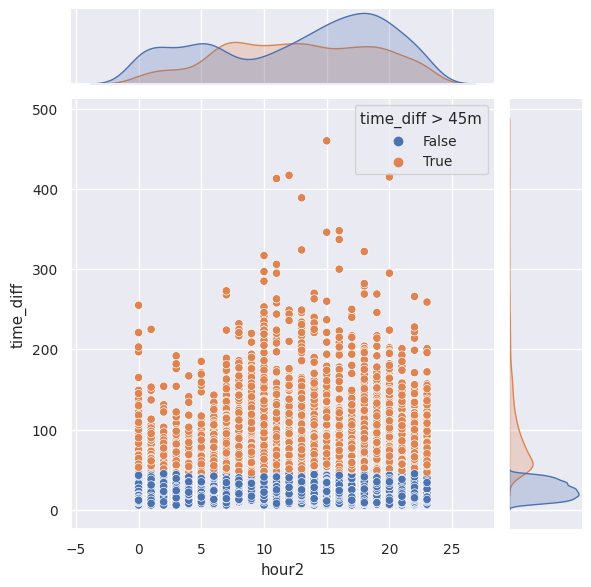

In [ ]:
sns.jointplot(x='hour2',y='time_diff',data=transformed_df1,hue='time_diff > 45m')

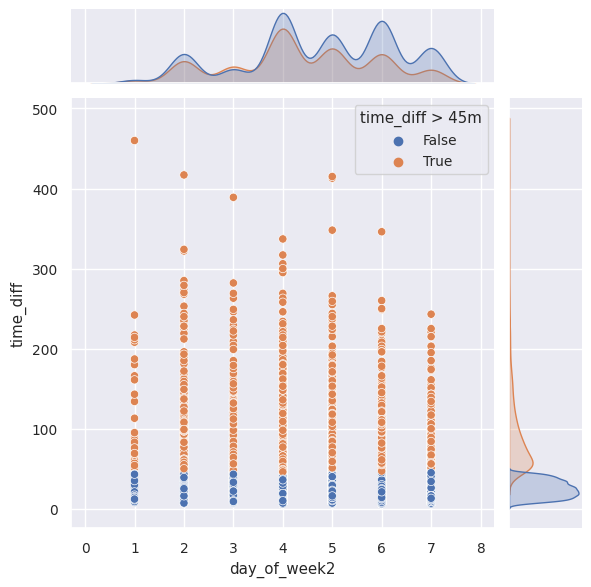

In [ ]:
sns.jointplot(x='day_of_week2',y='time_diff',data=transformed_df1,hue='time_diff > 45m')

## Study for Out-Gate

In [ ]:
shipper_13 = new_df1[new_df1['OUTGATE_SHIPPER'].str.strip().str.lower() == 'shipper 13']
shipper_13.time_diff.mean()

81.01973684210526

In [ ]:
shipper_84 = new_df1[new_df1['OUTGATE_SHIPPER'].str.strip().str.lower() == 'shipper 84']
shipper_84.time_diff.mean()

95.25773195876289

In [ ]:
Top_10_OutShippers = new_df1['OUTGATE_SHIPPER'].value_counts().head(20)
Top_10_OutShippers

                    2201
Shipper A            881
AGENT                195
Shipper L            164
Shipper 81           160
Shipper 13           152
Shipper D            147
Shipper Q            134
Shipper R            118
Shipper 9            117
Shipper 108          113
Shipper Z            103
Shipper V            100
Shipper G             99
Shipper 84            97
Shipper Y             85
Shipper T             77
Shipper K             76
Shipper F             75
Shipper E             75
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
Top_20_OutShippers_late = filtered_df1['OUTGATE_SHIPPER'].value_counts().head(20)
Top_20_OutShippers_late

                    324
Shipper A           250
Shipper L           105
Shipper 13          103
Shipper Z            83
Shipper 84           82
AGENT                76
Shipper 9            75
Shipper 81           74
Shipper V            65
Shipper Y            52
Shipper R            52
Shipper T            50
Shipper F            48
Shipper Q            44
Shipper 379          43
Shipper 299          42
Shipper G            41
Shipper 108          38
Shipper 143          37
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
outshipper = filtered_df1[filtered_df1['OUTGATE_SHIPPER'] == 'Shipper 84']
outshipper.head(5)

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
54,2022-10-01,1900-01-01 04:52:01,2022-10-01,1900-01-01 06:39:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 84,Saturday,4,Saturday,6,2022-10-01 04:52:01-01:00,2022-10-01 06:39:01-01:00,107.0
98,2022-10-01,1900-01-01 05:57:01,2022-10-01,1900-01-01 08:28:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 84,Saturday,5,Saturday,8,2022-10-01 05:57:01-01:00,2022-10-01 08:28:01-01:00,151.0
379,2022-10-01,1900-01-01 16:04:01,2022-10-01,1900-01-01 17:23:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 84,Saturday,16,Saturday,17,2022-10-01 16:04:01-01:00,2022-10-01 17:23:01-01:00,79.0
509,2022-10-01,1900-01-01 19:16:01,2022-10-01,1900-01-01 20:30:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 84,Saturday,19,Saturday,20,2022-10-01 19:16:01-01:00,2022-10-01 20:30:01-01:00,74.0
794,2022-11-01,1900-01-01 09:14:01,2022-11-01,1900-01-01 10:41:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 84,Tuesday,9,Tuesday,10,2022-11-01 09:14:01-01:00,2022-11-01 10:41:01-01:00,87.0


In [ ]:
outshipper_13 = filtered_df1[filtered_df1['OUTGATE_SHIPPER'].str.strip().str.lower() == 'shipper 13']
outshipper_13.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
24,2022-10-01,1900-01-01 02:00:01,2022-10-01,1900-01-01 02:52:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 13,Saturday,2,Saturday,2,2022-10-01 02:00:01-01:00,2022-10-01 02:52:01-01:00,52.0
26,2022-10-01,1900-01-01 02:02:01,2022-10-01,1900-01-01 02:51:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 13,Saturday,2,Saturday,2,2022-10-01 02:02:01-01:00,2022-10-01 02:51:01-01:00,49.0
33,2022-10-01,1900-01-01 03:05:01,2022-10-01,1900-01-01 04:17:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper 11,Shipper 13,Saturday,3,Saturday,4,2022-10-01 03:05:01-01:00,2022-10-01 04:17:01-01:00,72.0
83,2022-10-01,1900-01-01 05:29:01,2022-10-01,1900-01-01 06:36:01,PICKUP UNIT,Domestic,Customer1,0,1,1,,Shipper 13,Saturday,5,Saturday,6,2022-10-01 05:29:01-01:00,2022-10-01 06:36:01-01:00,67.0
88,2022-10-01,1900-01-01 05:35:01,2022-10-01,1900-01-01 06:24:01,DROP UNIT PICKUP UNIT,Domestic,Customer1,1,1,1,Shipper Z,Shipper 13,Saturday,5,Saturday,6,2022-10-01 05:35:01-01:00,2022-10-01 06:24:01-01:00,49.0


## For Out Gate Shipper, get the following insight:
* Shipper Z, Shipper 84 and Shipper V 's performance are not good, should be

  removed from the Shipper pool.

  Since Shipper Z ranked no.4 in long time difference, but the total shipment
  
  is not even in the top 10.
  
  
 * Same reason for Shipper 84 and Shipper V. They both ranked in top 10 of long
  
  time difference, but the total shipment is not in top 10.  

# Conclution for Domestic Shipping regarding time between in and out:

* Shipper 84
* Shipper Z
* Shipper 2
* Shipper V

#### The above shippers performance are not as good as others.

Consider to change to other good Shipper such as Shipper A; AGENT.



In [ ]:
df1['MOVE TYPE'].value_counts()

1    3027
2    2389
3    2077
4     124
5      24
Name: MOVE TYPE, dtype: int64

In [ ]:
filtered_df1['MOVE TYPE'].value_counts()

DROP UNIT PICKUP UNIT       1629
PICKUP UNIT                 1135
DROP UNIT                    322
DROP CHASSIS PICKUP UNIT       8
DROP CHASSIS                   2
Name: MOVE TYPE, dtype: int64

In [ ]:
ShipperI_drop_unit_long = filtered_df1.loc[filtered_df1['MOVE TYPE'] == 'DROP UNIT', 'INGATE_SHIPPER']

ShipperI_drop_unit_long.value_counts()

Shipper L        28
Shipper A        26
Shipper 1        17
Shipper Q        15
Shipper 9        12
                 ..
Shipper 246       1
Shipper 270       1
Shipper 431       1
Shipper 118       1
Shipper 300       1
Name: INGATE_SHIPPER, Length: 109, dtype: int64

### Insight from MOVE TYPE:

* Drop unit should not take more than 45 minuts.
* Shipper A and Shipper L both have bigger shipping volume, if they could enhance their efficiency for drop unit, the late rate will be improved.  

# International Shipping



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# read excel data df2 as customer2
data_path1 = '/content/drive/MyDrive/Data/CN/Test Data v3.xlsx'
df2 = pd.read_excel(data_path1, sheet_name = 'Customer2')
df2_copy = df2.copy()
df2.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER
0,2022-01-10,05:28:01,2022-01-10,05:44:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A
1,2022-01-10,05:40:01,2022-01-10,06:07:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper B
2,2022-01-10,05:50:01,2022-01-10,06:35:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A
3,2022-01-10,05:57:01,2022-01-10,06:27:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A
4,2022-01-10,06:00:01,2022-01-10,06:33:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper C


In [ ]:
# check if there are missing value in df2
temp_null=df2.isnull().sum()
total=df2.isnull().count()
percent=temp_null/total
missing_data=pd.concat([temp_null,percent],axis=1,keys=['temp_null','percent'])
missing_data

,temp_null,percent
INGATE DATE,0,0.0
INGATE TIME,0,0.0
OUTGATE DATE,0,0.0
OUTGATE TIME,0,0.0
MOVE TYPE,0,0.0
MARKET SEGMENT,0,0.0
CUSTOMER,0,0.0
INGATE EQUIP COUNT,0,0.0
PLANNED OUTGATE EQUIP COUNT,0,0.0
OUTGATE EQUIP COUNT,0,0.0


In [ ]:
# change the data type to datetime
from datetime import datetime
df2['INGATE DATE'] = pd.to_datetime(df2['INGATE DATE'])
df2['INGATE TIME'] = pd.to_datetime(df2['INGATE TIME'], format='%H:%M:%S')

In [ ]:
df2['day_of_week'] = df2['INGATE DATE'].dt.day_name()
df2['hour'] = df2['INGATE TIME'].dt.hour



In [ ]:
# Group by hour of the day and calculate average value
hourly_avg = df2.groupby('hour').count()

# Group by day of the week and calculate count
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_count = df2.groupby('day_of_week')['INGATE DATE'].count().reindex(weekday_order)

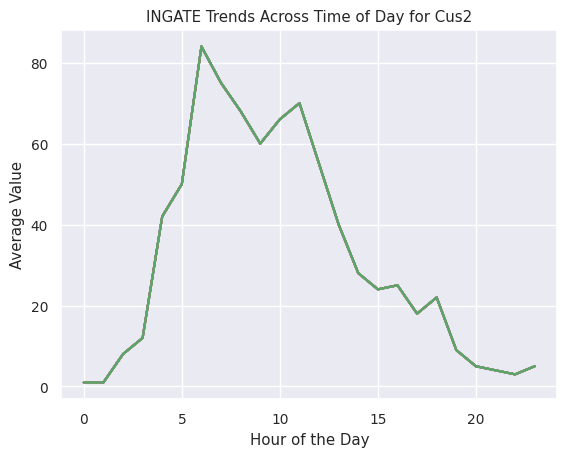

In [ ]:
# Plot the hourly counts
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.title('INGATE Trends Across Time of Day for Cus2')
plt.show()

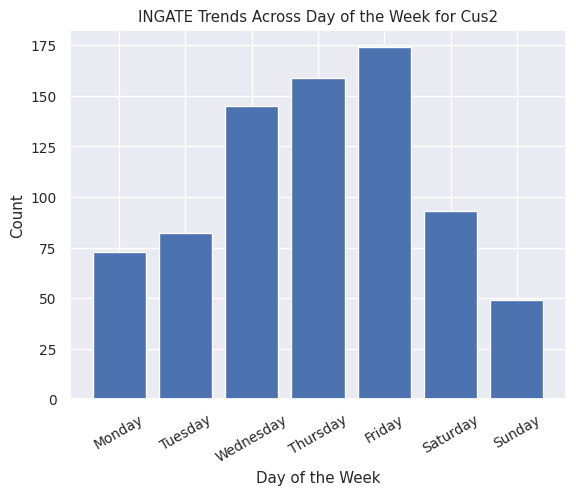

In [ ]:
# Plot the daily count
plt.bar(daily_count.index, daily_count.values)
plt.xlabel('Day of the Week')
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.title('INGATE Trends Across Day of the Week for Cus2')
plt.show()

In [ ]:
df2['OUTGATE DATE'] = pd.to_datetime(df2['OUTGATE DATE'])
df2['OUTGATE TIME'] = pd.to_datetime(df2['OUTGATE TIME'], format='%H:%M:%S')

In [ ]:
df2['day_of_week2'] = df2['OUTGATE DATE'].dt.day_name()
df2['hour2'] = df2['OUTGATE TIME'].dt.hour

In [ ]:
# Group by hour of the day and calculate average value
hourly_avg = df2.groupby('hour2').count()

# Group by day of the week and calculate count
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_count = df2.groupby('day_of_week2')['OUTGATE DATE'].count().reindex(weekday_order)

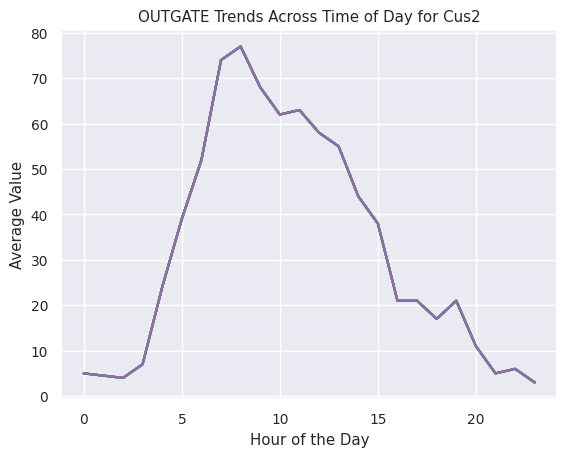

In [ ]:
# Plot the hourly counts for outgate
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.title('OUTGATE Trends Across Time of Day for Cus2')
plt.show()

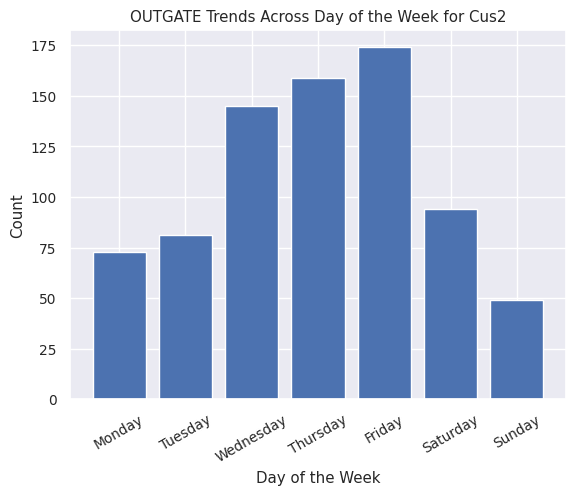

In [ ]:
# Plot the daily count
plt.bar(daily_count.index, daily_count.values)
plt.xlabel('Day of the Week')
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.title('OUTGATE Trends Across Day of the Week for Cus2')
plt.show()

In [ ]:
df2['indatetime'] = pd.to_datetime(df2['INGATE DATE'].astype(str) + ' ' + df2['INGATE TIME'].astype(str))

In [ ]:
df2['outdatetime'] = pd.to_datetime(df2['OUTGATE DATE'].astype(str) + ' ' + df2['OUTGATE TIME'].astype(str))

In [ ]:
df2['time_diff'] = df2.outdatetime - df2.indatetime
df2.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-01-10,1900-01-01 05:28:01,2022-01-10,1900-01-01 05:44:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,5,2022-01-10 05:28:01-01:00,2022-01-10 05:44:01-01:00,0 days 00:16:00
1,2022-01-10,1900-01-01 05:40:01,2022-01-10,1900-01-01 06:07:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper B,Monday,5,Monday,6,2022-01-10 05:40:01-01:00,2022-01-10 06:07:01-01:00,0 days 00:27:00
2,2022-01-10,1900-01-01 05:50:01,2022-01-10,1900-01-01 06:35:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,6,2022-01-10 05:50:01-01:00,2022-01-10 06:35:01-01:00,0 days 00:45:00
3,2022-01-10,1900-01-01 05:57:01,2022-01-10,1900-01-01 06:27:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,6,2022-01-10 05:57:01-01:00,2022-01-10 06:27:01-01:00,0 days 00:30:00
4,2022-01-10,1900-01-01 06:00:01,2022-01-10,1900-01-01 06:33:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper C,Monday,6,Monday,6,2022-01-10 06:00:01-01:00,2022-01-10 06:33:01-01:00,0 days 00:33:00


In [ ]:
df2.shape

(775, 19)

In [ ]:
# drop the data which has negative days and has value of days more than 1
df2 = df2[df2['time_diff']>= pd.Timedelta(days=0)]
df2 = df2[df2['time_diff']< pd.Timedelta(days=1)]

In [ ]:
df2.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-01-10,1900-01-01 05:28:01,2022-01-10,1900-01-01 05:44:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,5,2022-01-10 05:28:01-01:00,2022-01-10 05:44:01-01:00,0 days 00:16:00
1,2022-01-10,1900-01-01 05:40:01,2022-01-10,1900-01-01 06:07:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper B,Monday,5,Monday,6,2022-01-10 05:40:01-01:00,2022-01-10 06:07:01-01:00,0 days 00:27:00
2,2022-01-10,1900-01-01 05:50:01,2022-01-10,1900-01-01 06:35:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,6,2022-01-10 05:50:01-01:00,2022-01-10 06:35:01-01:00,0 days 00:45:00
3,2022-01-10,1900-01-01 05:57:01,2022-01-10,1900-01-01 06:27:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,6,2022-01-10 05:57:01-01:00,2022-01-10 06:27:01-01:00,0 days 00:30:00
4,2022-01-10,1900-01-01 06:00:01,2022-01-10,1900-01-01 06:33:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper C,Monday,6,Monday,6,2022-01-10 06:00:01-01:00,2022-01-10 06:33:01-01:00,0 days 00:33:00


In [ ]:
# Convert 'time_diff' to minutes
df2['time_diff'] = df2['time_diff'].apply(lambda x: x.total_seconds() / 60)
df2.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff
0,2022-01-10,1900-01-01 05:28:01,2022-01-10,1900-01-01 05:44:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,5,2022-01-10 05:28:01-01:00,2022-01-10 05:44:01-01:00,16.0
1,2022-01-10,1900-01-01 05:40:01,2022-01-10,1900-01-01 06:07:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper B,Monday,5,Monday,6,2022-01-10 05:40:01-01:00,2022-01-10 06:07:01-01:00,27.0
2,2022-01-10,1900-01-01 05:50:01,2022-01-10,1900-01-01 06:35:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,6,2022-01-10 05:50:01-01:00,2022-01-10 06:35:01-01:00,45.0
3,2022-01-10,1900-01-01 05:57:01,2022-01-10,1900-01-01 06:27:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper A,Monday,5,Monday,6,2022-01-10 05:57:01-01:00,2022-01-10 06:27:01-01:00,30.0
4,2022-01-10,1900-01-01 06:00:01,2022-01-10,1900-01-01 06:33:01,PICKUP UNIT,International,Customer2,0,1,1,,Shipper C,Monday,6,Monday,6,2022-01-10 06:00:01-01:00,2022-01-10 06:33:01-01:00,33.0


In [ ]:
new_df2 = df2.copy(deep=True)

In [ ]:
df2['OUTGATE_SHIPPER'] = df2['OUTGATE_SHIPPER'].apply(Outshipper2num)

In [ ]:
df2['INGATE_SHIPPER'] = df2['INGATE_SHIPPER'].apply(Inshipper2num)

In [ ]:
df2['day_of_week'] = df2['day_of_week'].apply(day_of_week2num)

In [ ]:
df2['day_of_week2'] = df2['day_of_week2'].apply(day_of_week2num)

In [ ]:
df2['MOVE TYPE'] = df2['MOVE TYPE'].apply(Movetype2num)

In [ ]:
transformed_df2 = pd.concat([df2['MOVE TYPE'], df2['INGATE EQUIP COUNT'], df2['PLANNED OUTGATE EQUIP COUNT'], df2['OUTGATE EQUIP COUNT'],
                             df2['INGATE_SHIPPER'], df2['OUTGATE_SHIPPER'], df2['day_of_week'],df2['hour'],df2['day_of_week2'],df2['hour2'],df2['time_diff']], axis=1)

In [ ]:
transformed_df2.head()

,MOVE TYPE,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,time_diff
0,2,0,1,1,0.0,765.0,1,5,1,5,16.0
1,2,0,1,1,0.0,766.0,1,5,1,6,27.0
2,2,0,1,1,0.0,765.0,1,5,1,6,45.0
3,2,0,1,1,0.0,765.0,1,5,1,6,30.0
4,2,0,1,1,0.0,767.0,1,6,1,6,33.0


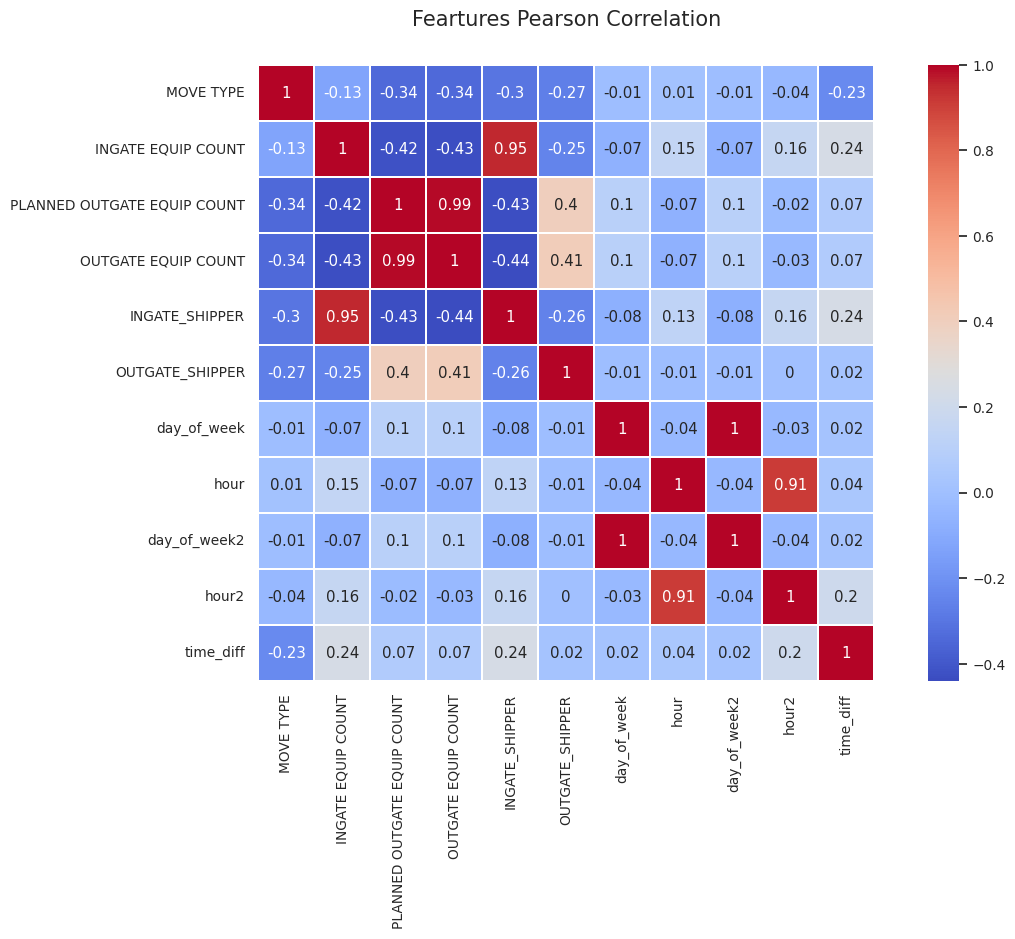

In [ ]:
pearson_corr(transformed_df2)

In [ ]:
transformed_df2_2 = transformed_df2.drop(['PLANNED OUTGATE EQUIP COUNT','day_of_week2','INGATE EQUIP COUNT'], axis=1)


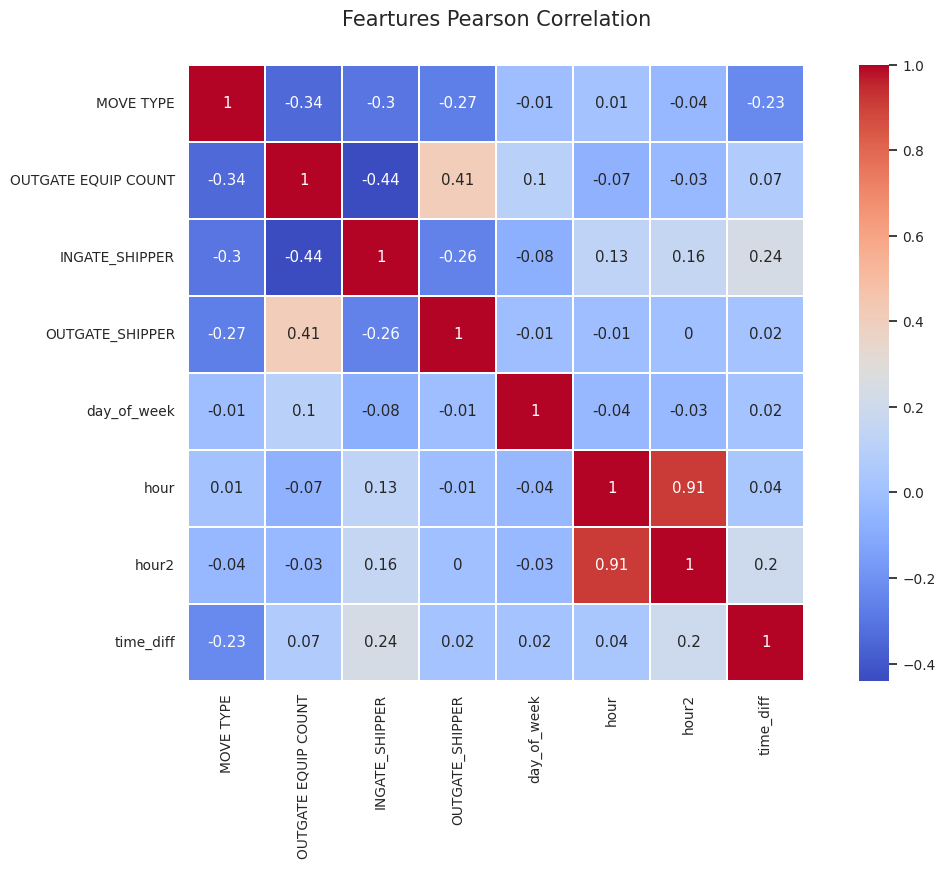

In [ ]:
pearson_corr(transformed_df2_2)

Text(0.5, 1.0, 'Correlation with TARGET variable')

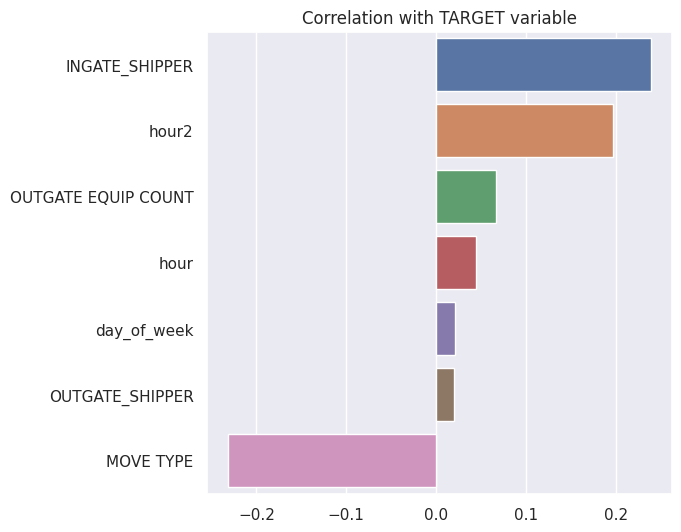

In [ ]:
sns.set(font_scale=1)
corr_with_status = transformed_df2_2.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.barplot(x=corr_with_status.values, y=corr_with_status.index)
plt.title('Correlation with TARGET variable')

In [ ]:
Pickup_unit2 = new_df2[new_df2['MOVE TYPE']== 'PICKUP UNIT']['time_diff'].mean()
Pickup_unit2

52.3847640562249

In [ ]:
Drop_chassis2 = new_df2[new_df2['MOVE TYPE']== 'DROP CHASSIS']['time_diff'].mean()
Drop_chassis2

nan

In [ ]:
Drop_unit2 = new_df2[new_df2['MOVE TYPE']== 'DROP UNIT']['time_diff'].mean()
Drop_unit2

46.4375

In [ ]:
Drop_chassis_pickup_unit2 = new_df2[new_df2['MOVE TYPE']== 'DROP CHASSIS PICKUP UNIT']['time_diff'].mean()
Drop_chassis_pickup_unit2

45.142857142857146

In [ ]:
Drop_unit_pickup_unit2 = new_df2[new_df2['MOVE TYPE']== 'DROP UNIT PICKUP UNIT']['time_diff'].mean()
Drop_unit_pickup_unit2

98.61111111111111

In [ ]:
Pick_chassis2 = new_df2[new_df2['MOVE TYPE']== 'PICKUP CHASSIS']['time_diff'].mean()
Pick_chassis2

nan

In [ ]:
transformed_df2['time_diff > 45m'] = transformed_df2['time_diff'].apply(lambda x : x > 45.0)

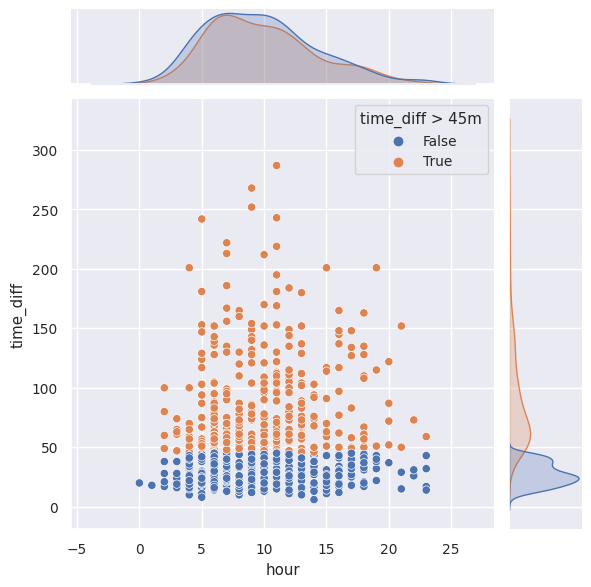

In [ ]:
sns.jointplot(x='hour',y='time_diff',data=transformed_df2,hue='time_diff > 45m')

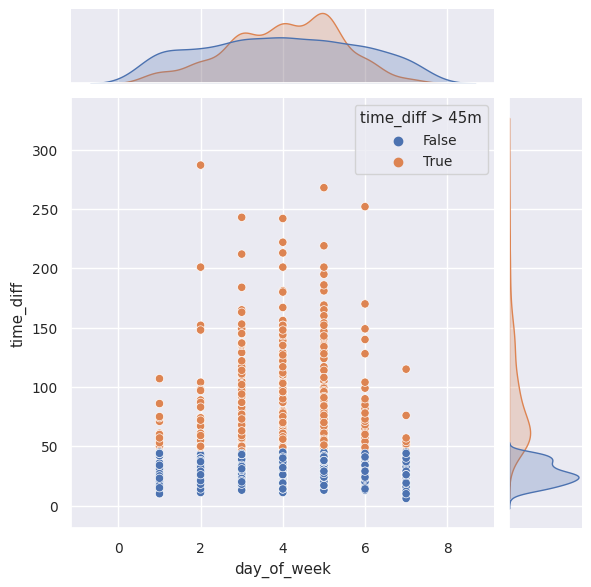

In [ ]:
sns.jointplot(x='day_of_week',y='time_diff',data=transformed_df2,hue='time_diff > 45m')

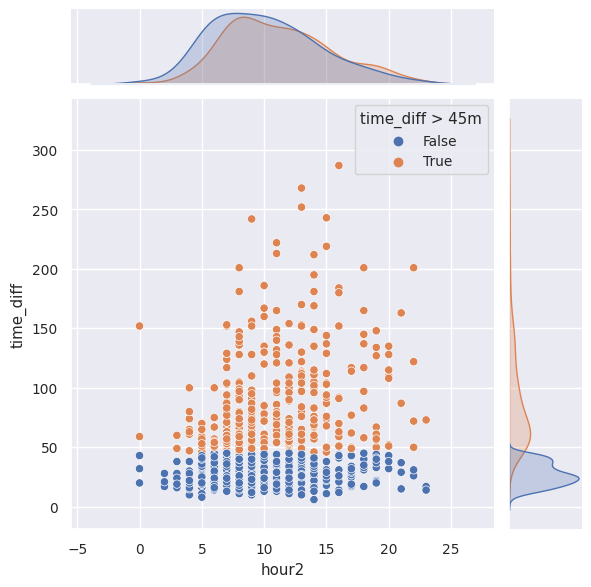

In [ ]:
sns.jointplot(x='hour2',y='time_diff',data=transformed_df2,hue='time_diff > 45m')

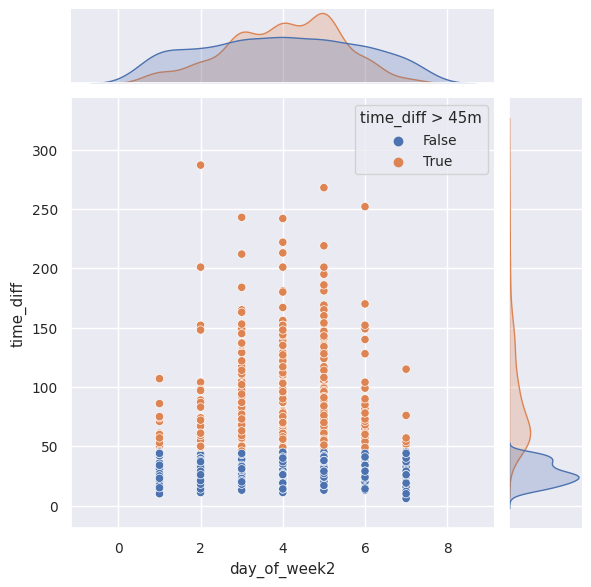

In [ ]:
sns.jointplot(x='day_of_week2',y='time_diff',data=transformed_df2,hue='time_diff > 45m')

In [ ]:
df2.describe()

,MOVE TYPE,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,time_diff
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,1.975484,0.145806,0.987097,0.985806,103.360000,706.899355,3.972903,9.785806,3.978065,10.596129,56.368366
std,0.463854,0.360383,0.258876,0.261292,262.691025,265.707038,1.653604,4.288746,1.653681,4.347708,43.260841
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000,1.000000,0.000000,1.000000,0.000000,6.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,765.000000,3.000000,6.000000,3.000000,7.000000,26.000000
50%,2.000000,0.000000,1.000000,1.000000,0.000000,765.000000,4.000000,9.000000,4.000000,10.000000,43.000000
75%,2.000000,0.000000,1.000000,1.000000,0.000000,768.000000,5.000000,12.000000,5.000000,13.000000,72.000000
max,5.000000,2.000000,2.000000,2.000000,785.000000,787.000000,7.000000,23.000000,7.000000,23.000000,287.000000


In [ ]:
# Find the rows that time difference is greater than 45 mintus
new_df2['time_diff > 45m'] = new_df2['time_diff'].apply(lambda x : x > 45.0)

In [ ]:
new_df2['time_diff > 45m'].value_counts()

False    416
True     359
Name: time_diff > 45m, dtype: int64

In [ ]:
Top_10_InShippers = new_df2['INGATE_SHIPPER'].value_counts().head(10)
Top_10_InShippers

                   664
Shipper A           35
Shipper K           31
Shipper C           16
AGENT                7
Shipper M            5
Shipper B            3
Shipper Q            3
Shipper E            3
Shipper G            3
Name: INGATE_SHIPPER, dtype: int64

In [ ]:
filtered_df2 = new_df2[new_df2['time_diff'] > 45]
Top_10_InShippers_long = filtered_df2['INGATE_SHIPPER'].value_counts().head(10)
Top_10_InShippers_long

                   290
Shipper K           22
Shipper A           20
Shipper C            9
Shipper M            4
Shipper G            3
AGENT                2
Shipper B            2
Shipper E            2
Shipper D            2
Name: INGATE_SHIPPER, dtype: int64

In [ ]:
shipper_a_late = filtered_df2[filtered_df2['INGATE_SHIPPER'].str.strip().str.lower() == 'shipper a']
shipper_a_late.head(10)

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff,time_diff > 45m
46,2022-01-10,1900-01-01 12:02:01,2022-01-10,1900-01-01 13:49:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper A,Monday,12,Monday,13,2022-01-10 12:02:01-01:00,2022-01-10 13:49:01-01:00,107.0,True
78,2022-01-11,1900-01-01 10:06:01,2022-01-11,1900-01-01 10:55:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper A,Tuesday,10,Tuesday,10,2022-01-11 10:06:01-01:00,2022-01-11 10:55:01-01:00,49.0,True
119,2022-01-12,1900-01-01 09:12:01,2022-01-12,1900-01-01 10:10:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper A,Wednesday,9,Wednesday,10,2022-01-12 09:12:01-01:00,2022-01-12 10:10:01-01:00,58.0,True
129,2022-01-12,1900-01-01 10:35:01,2022-01-12,1900-01-01 11:32:01,DROP UNIT,International,Customer2,1,0,0,Shipper A,,Wednesday,10,Wednesday,11,2022-01-12 10:35:01-01:00,2022-01-12 11:32:01-01:00,57.0,True
142,2022-01-12,1900-01-01 16:13:01,2022-01-12,1900-01-01 18:38:01,DROP UNIT,International,Customer2,1,0,0,Shipper A,,Wednesday,16,Wednesday,18,2022-01-12 16:13:01-01:00,2022-01-12 18:38:01-01:00,145.0,True
171,2022-01-13,1900-01-01 07:51:01,2022-01-13,1900-01-01 09:26:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper K,Thursday,7,Thursday,9,2022-01-13 07:51:01-01:00,2022-01-13 09:26:01-01:00,95.0,True
268,2022-01-14,1900-01-01 09:00:01,2022-01-14,1900-01-01 11:21:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper B,Friday,9,Friday,11,2022-01-14 09:00:01-01:00,2022-01-14 11:21:01-01:00,141.0,True
293,2022-01-14,1900-01-01 11:24:01,2022-01-14,1900-01-01 14:25:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper K,Friday,11,Friday,14,2022-01-14 11:24:01-01:00,2022-01-14 14:25:01-01:00,181.0,True
314,2022-01-14,1900-01-01 16:03:01,2022-01-14,1900-01-01 18:48:01,DROP UNIT PICKUP UNIT,International,Customer2,1,1,1,Shipper A,Shipper A,Friday,16,Friday,18,2022-01-14 16:03:01-01:00,2022-01-14 18:48:01-01:00,165.0,True
318,2022-01-14,1900-01-01 17:50:01,2022-01-14,1900-01-01 18:48:01,DROP UNIT,International,Customer2,1,0,0,Shipper A,,Friday,17,Friday,18,2022-01-14 17:50:01-01:00,2022-01-14 18:48:01-01:00,58.0,True


In [ ]:
shipper_k_late = filtered_df2[filtered_df2['INGATE_SHIPPER'].str.strip().str.lower() == 'shipper k']
shipper_k_late.head(5)

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff,time_diff > 45m
90,2022-01-11,1900-01-01 13:34:01,2022-01-11,1900-01-01 15:18:01,DROP UNIT,International,Customer2,1,0,0,Shipper K,,Tuesday,13,Tuesday,15,2022-01-11 13:34:01-01:00,2022-01-11 15:18:01-01:00,104.0,True
91,2022-01-11,1900-01-01 13:52:01,2022-01-11,1900-01-01 15:21:01,DROP UNIT,International,Customer2,1,0,0,Shipper K,,Tuesday,13,Tuesday,15,2022-01-11 13:52:01-01:00,2022-01-11 15:21:01-01:00,89.0,True
92,2022-01-11,1900-01-01 13:53:01,2022-01-11,1900-01-01 15:20:01,DROP UNIT,International,Customer2,1,0,0,Shipper K,,Tuesday,13,Tuesday,15,2022-01-11 13:53:01-01:00,2022-01-11 15:20:01-01:00,87.0,True
94,2022-01-11,1900-01-01 14:09:01,2022-01-11,1900-01-01 15:23:01,DROP UNIT,International,Customer2,1,0,0,Shipper K,,Tuesday,14,Tuesday,15,2022-01-11 14:09:01-01:00,2022-01-11 15:23:01-01:00,74.0,True
419,2022-01-18,1900-01-01 11:48:01,2022-01-18,1900-01-01 13:26:01,DROP UNIT,International,Customer2,1,0,0,Shipper K,,Tuesday,11,Tuesday,13,2022-01-18 11:48:01-01:00,2022-01-18 13:26:01-01:00,98.0,True


In [ ]:
shipper_agent_late = filtered_df2[filtered_df2['INGATE_SHIPPER'].str.strip().str.lower() == 'agent']
shipper_agent_late.head()

,INGATE DATE,INGATE TIME,OUTGATE DATE,OUTGATE TIME,MOVE TYPE,MARKET SEGMENT,CUSTOMER,INGATE EQUIP COUNT,PLANNED OUTGATE EQUIP COUNT,OUTGATE EQUIP COUNT,INGATE_SHIPPER,OUTGATE_SHIPPER,day_of_week,hour,day_of_week2,hour2,indatetime,outdatetime,time_diff,time_diff > 45m
167,2022-01-13,1900-01-01 07:25:01,2022-01-13,1900-01-01 08:31:01,DROP CHASSIS PICKUP UNIT,International,Customer2,1,1,1,AGENT,Shipper A,Thursday,7,Thursday,8,2022-01-13 07:25:01-01:00,2022-01-13 08:31:01-01:00,66.0,True
298,2022-01-14,1900-01-01 11:45:01,2022-01-14,1900-01-01 13:55:01,DROP CHASSIS PICKUP UNIT,International,Customer2,1,1,1,AGENT,Shipper B,Friday,11,Friday,13,2022-01-14 11:45:01-01:00,2022-01-14 13:55:01-01:00,130.0,True


## Conclution for INGATE Shipper:
* Shipper G total has 3 shippments, and all 3 are longer than 45 minutes.
* Do not recommend to use their service

## Study Out-Gate

In [ ]:
Top_10_OutShippers = new_df2['OUTGATE_SHIPPER'].value_counts().head(10)
Top_10_OutShippers

Shipper A          429
Shipper K           51
Shipper B           50
Shipper G           45
Shipper C           41
                    32
Shipper D           31
Shipper U           23
Shipper Q           22
Shipper E           20
Name: OUTGATE_SHIPPER, dtype: int64

In [ ]:
filtered_df2 = new_df2[new_df2['time_diff'] > 45]
Top_10_InShippers_long = filtered_df2['OUTGATE_SHIPPER'].value_counts().head(10)
Top_10_InShippers_long

Shipper A          198
Shipper K           30
Shipper B           27
Shipper C           22
Shipper G           20
Shipper Q           13
                    12
Shipper D           10
Shipper U            7
Shipper E            7
Name: OUTGATE_SHIPPER, dtype: int64

## For OutGate Shipper:
* Shipper Q has more than 50% shippment are longer than 45 minutes between in and out.

In [ ]:
new_df2['MOVE TYPE'].value_counts()

PICKUP UNIT                 664
DROP UNIT PICKUP UNIT        72
DROP UNIT                    32
DROP CHASSIS PICKUP UNIT      7
Name: MOVE TYPE, dtype: int64

In [ ]:
filtered_df2['MOVE TYPE'].value_counts()

PICKUP UNIT                 290
DROP UNIT PICKUP UNIT        55
DROP UNIT                    12
DROP CHASSIS PICKUP UNIT      2
Name: MOVE TYPE, dtype: int64

# Conclution for customer 2
## Shipper A, K, B  have better service in Customer2.
## Shipper Q and Shipper G need to improve time management.

# Question 2:
build a high-level roadmap for potential predictive analytics or ML algorithms

that could be used to help the company make more data-driven decision in the

future to provide better customer service.

Tips: what’s going to be the end-to-end life cycle of those additional

development? Additional data needed? Tools, techniques, or algorithms you’re planning to use?  


## Roadmap:
* Change all the categorical data into numerical data by Ordinal Encoding;
  
  one-Hot encoding;
* Normalizing the data for Pearson correlation test;
* Find the correlation between different features and deal with Collinearity;
* If needed, creat new feature to predict the long time difference;
* Split the data into training set and testing set;
* Train logistic regression model in order to predict the long time difference

  by using the shipper, type of move, in or out;
* Try several different machine learning model to get better testing result
* By predictive analysis, we could predict which shipper will have higher

  probability having long time difference and set up procedure to prevent it

  happen.
* By segmentation the shipper according to the probability, we could always get

  rid of the longest time difference shipper, and transfer the job to the better

  shipper in order to provide better customer service.
* After certain time, we will need to run the model again with new data, and go

  through the whole process choose segmentation of the long time difference.

## Additional data:
* If possible, should get the truck infromation. Since most of the time, it is

  the small problem of truck cause the long delay.

## Techniques:
* Will try tree model and XGBoots.
* IF the computational resource allowed, could try use neural network to predict.